## Observations and Insights 

In [1]:
# Dependencies and Setup 

import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
#import seaborn as sns


# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
overall_mouse_data_df = pd.merge(study_results, mouse_metadata,
                                 how='outer', on='Mouse ID')

# Display the data table for preview
#mouse_metadata.count()
#study_results.count()
overall_mouse_data_df.head(12)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
5,b128,25,43.262145,1,Capomulin,Female,9,22
6,b128,30,40.605335,1,Capomulin,Female,9,22
7,b128,35,37.967644,1,Capomulin,Female,9,22
8,b128,40,38.379726,2,Capomulin,Female,9,22
9,b128,45,38.982878,2,Capomulin,Female,9,22


In [2]:
#General Info
overall_mouse_data_df.dtypes

Mouse ID               object
Timepoint               int64
Tumor Volume (mm3)    float64
Metastatic Sites        int64
Drug Regimen           object
Sex                    object
Age_months              int64
Weight (g)              int64
dtype: object

In [3]:
# Cleaning Data - Checking for overall mouse count
mouse_count_df = overall_mouse_data_df.count()
mouse_count_df

Mouse ID              1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
dtype: int64

In [4]:
# Cleaning Data - Dropped the duplicate mouse data.
mouse_data_nodupes_df= overall_mouse_data_df.drop_duplicates(subset=['Mouse ID','Timepoint'])
mouse_data_nodupes_df.count()

Mouse ID              1888
Timepoint             1888
Tumor Volume (mm3)    1888
Metastatic Sites      1888
Drug Regimen          1888
Sex                   1888
Age_months            1888
Weight (g)            1888
dtype: int64

## Summary Statistics

In [5]:
#Drug Statistics - Finding the Mean, Median, Variance, Standard Deviation and SEM by tumor volume - Version 1

#mouse_data_nodupes_df.groupby('Drug Regimen', as_index = True)["Tumor Volume (mm3)"].describe()
var_stat= mouse_data_nodupes_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].var()
med_stat= mouse_data_nodupes_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].median()
std_stat= mouse_data_nodupes_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].std()
men_stat= mouse_data_nodupes_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].mean()
sem_stat= mouse_data_nodupes_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].sem()

#stats_df
#var_stat
#med_stat
#std_stat
#men_stat
#sem_stat

drug_stat_df = pd.DataFrame({"Variance":var_stat, "Median": med_stat, "Mean": men_stat, "Standard Dev": std_stat, "SEM": sem_stat})
drug_stat_df

,Variance,Median,Mean,Standard Dev,SEM
Drug Regimen,,,,,
Capomulin,24.947764,41.557809,40.675741,4.994774,0.329346
Ceftamin,39.290177,51.776157,52.591172,6.268188,0.469821
Infubinol,43.128684,51.820584,52.884795,6.567243,0.492236
Ketapril,68.553577,53.698743,55.235638,8.279709,0.603860
Naftisol,66.173479,52.509285,54.331565,8.134708,0.596466
Placebo,61.168083,52.288934,54.033581,7.821003,0.581331
Propriva,43.138803,50.909965,52.393463,6.568014,0.525862
Ramicane,23.486704,40.673236,40.216745,4.846308,0.320955
Stelasyn,59.450562,52.431737,54.233149,7.710419,0.573111


In [6]:
##Drug Statistics - Finding the Mean, Median, Variance, Standard Deviation and SEM by tumor volume - Version 2
 
#Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function

drug_stat_v2_df = mouse_data_nodupes_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})
#drug_stat_v2_df

## Bar and Pie Charts

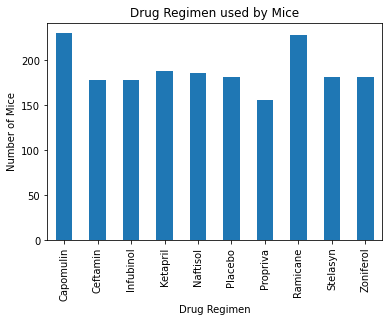

In [7]:
# Bar Chart - Count of Mice Using Drug Regimen - with Pandas Dataframe
users_df = mouse_data_nodupes_df.groupby("Drug Regimen")["Mouse ID"].count()

#x_axis = mouse_data_nodupes_df.np.arange(len("Drug Regimen"))

#plt.bar(x_axis, users, color='r', alpha=0.5, align="center"
users_df.plot(kind="bar")
plt.title("Drug Regimen used by Mice")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
#users2_df= mouse_data_nodupes_df.plot(mouse_data_nodupes_df['Drug Regimen'], kind='bar' , legend=None)
plt.show()

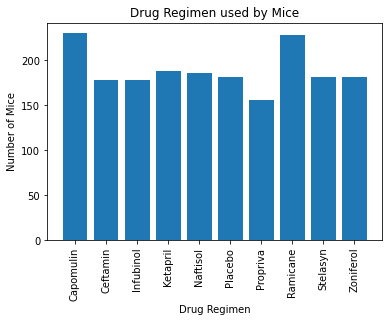

In [8]:
# Bar Chart - Count of Mice Using Drug Regimen - with Matplotlib Dataframe
reset_user_df= users_df.reset_index()
x_data = range(len(reset_user_df["Mouse ID"]))
y_data = reset_user_df["Mouse ID"]
plt.bar(x_data, y_data)
plt.title("Drug Regimen used by Mice")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.xticks(x_data, (reset_user_df["Drug Regimen"]), rotation='vertical')
#users2_df= mouse_data_nodupes_df.plot(mouse_data_nodupes_df['Drug Regimen'], kind='bar' , legend=None)
plt.show()


In [9]:
number_of_mice = mouse_data_nodupes_df.groupby("Drug Regimen")["Mouse ID"].count()
number_of_mice

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     156
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

In [10]:
#Pie Chart - Sex of Mouse in Study - with Pandas Dataframe
gender_of_mice = mouse_data_nodupes_df["Sex"].value_counts()
gender_of_mice_df = pd.DataFrame(gender_of_mice)
gender_of_mice_df['Gender_pct'] = (gender_of_mice_df.Sex / (gender_of_mice_df.Sex.sum()/100)).round(decimals=2)
renamed_genders_of_mice_df = gender_of_mice_df.rename(columns={"Sex":"Total Count", "Gender_pct":"Percentage of Mice"})
def format(x):
    return "{:.1f}%".format(x)
renamed_genders_of_mice_df['Percentage of Mice'] = renamed_genders_of_mice_df['Percentage of Mice'].apply(format)
renamed_genders_of_mice_df


,Total Count,Percentage of Mice
Male,958,50.7%
Female,930,49.3%


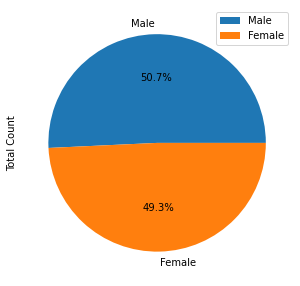

In [11]:
#Pie Chart - Sex of Mouse in Study - with Pandas Dataframe
#renamed_genders_of_mice_df.plot(kind="pie")
plot=renamed_genders_of_mice_df.plot.pie(y='Total Count', figsize=(5, 5), autopct='%1.1f%%')
#plt.show()

([<matplotlib.patches.Wedge at 0x2148e540128>,
 [Text(-0.7265028750894215, -0.8259501029038041, 'Female'),
  Text(0.7265029524204479, 0.8259500348836922, 'Male')],
 [Text(-0.3962742955033208, -0.45051823794752943, '49.3%'),
  Text(0.39627433768388065, 0.4505182008456502, '50.7%')])

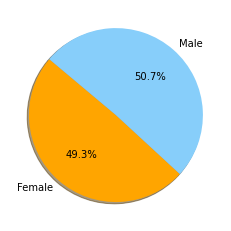

In [12]:
#Pie Chart - Sex of Mouse in Study - with Matplotlib Plot 
user_counts = mouse_data_nodupes_df.groupby('Sex')['Mouse ID'].count().reset_index()
users = user_counts
label = user_counts["Sex"]
colors = ["orange", "lightskyblue"]
explode = (0.1, 0, 0, 0)
#x_axis = mouse_data_nodupes_df.np.arange(len("Drug Regimen"))
# Tells matplotlib to seperate the "Humans" section from the others

plt.pie(users["Mouse ID"], labels=label, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
#users = mouse_data_nodupes_df.("Mouse ID").count
#x_axis = mouse_data_nodupes_df.np.arange(len("Drug Regimen"))

#plt.bar(x_axis, users, color='r', alpha=0.5, align="center")


In [13]:
user_counts.head()

,Sex,Mouse ID
0,Female,930
1,Male,958


## Quartiles, Outliers and Boxplots

In [14]:
#Calculate the final tumor volume of each mouse across four of the most promising treatment regimens: 
#Capomulin, Ramicane, Infubinol, and Ceftamin. Calculate the quartiles and IQR and quantitatively determine if there are any potential outliers across all four treatment regimens.
#sort least to most and pick the last.
drug_list=['Capomulin','Ramicane','Infubinol','Ceftamin']
mouse_data_nodupes_df= mouse_data_nodupes_df.sort_values("Timepoint")
last_timepoints_df = mouse_data_nodupes_df.groupby("Mouse ID").last()
Capomulin_df = last_timepoints_df[last_timepoints_df["Drug Regimen"] == "Capomulin"]
#Capomulin_df

In [15]:
Ramicane_df = last_timepoints_df[last_timepoints_df["Drug Regimen"] == "Ramicane"]
#Ramicane_df

In [16]:
Infubinol_df = last_timepoints_df[last_timepoints_df["Drug Regimen"] == "Infubinol"]
#Infubinol_df

In [17]:
Ceftamin_df = last_timepoints_df[last_timepoints_df["Drug Regimen"] == "Ceftamin"]
#Ceftamin_df

In [18]:
tumor_vols = [Capomulin_df['Tumor Volume (mm3)'],Ramicane_df['Tumor Volume (mm3)'],Infubinol_df['Tumor Volume (mm3)'],Ceftamin_df['Tumor Volume (mm3)']]
#tumor_vols

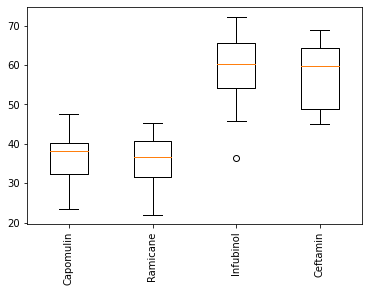

In [19]:
fig1, ax1 = plt.subplots()
ax1.boxplot(tumor_vols)
plt.xticks(range(1,len(drug_list)+1), drug_list, rotation = 90)
plt.show()


In [27]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  

#forlabel, row in df.iterrows():

#create a list of the four drugs we care about

#loop through each of the four drugs

for drug in drug_list:

    #Create a small dataframe of ONE drug off of our main dataframe
    drug_list_df = mouse_data_nodupes_df[mouse_data_nodupes_df['Drug Regimen'] == drug]

    #group the mice togeteher within the small dataframe
    grouped = drug_list_df.groupby('Mouse ID')

    #loop through the groups of mice
    for name, group in grouped:    
        max_value=group['Timepoint'].argmax()
        tumor_vol =group.iloc[max_value]['Tumor Volume (mm3)']
        mouse_id=group.iloc[max_value]['Mouse ID']
        #print ((drug), (mouse_id),  (tumor_vol))

#Initial code for finding the desired data from one mouse
#b128_df = mouse_data_nodupes_df.loc[mouse_data_nodupes_df['Mouse ID'] == 'g107']
#max_value=b128_df['Timepoint'].argmax()
#tumor_vol =b128_df.iloc[max_value]['Tumor Volume (mm3)']
#tumor_vol
#b128_df

# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
# Have the data in a dataframe of what I need.  Don't need to merge back into dataframe.

#I was attempting this answer twice trying to figure out the right approach.  This was a seperate way that I was trying to get the answer, I did diverge away from this approach for the one above.  

## Line and Scatter Plots

In [21]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
tumor_capomulin_df = mouse_data_nodupes_df[mouse_data_nodupes_df["Drug Regimen"] == "Capomulin"]
tumor_capomulin_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1673,j246,0,45.000000,0,Capomulin,Female,21,21
1681,r554,0,45.000000,0,Capomulin,Female,8,17
1691,s185,0,45.000000,0,Capomulin,Female,3,17
1701,b742,0,45.000000,0,Capomulin,Male,7,21
...,...,...,...,...,...,...,...,...
1740,s710,45,40.728578,1,Capomulin,Female,1,23
1754,u364,45,31.023923,3,Capomulin,Male,18,17
1764,j119,45,38.125164,1,Capomulin,Female,7,23
1700,s185,45,23.343598,1,Capomulin,Female,3,17


In [22]:
b128_df = tumor_capomulin_df.loc[tumor_capomulin_df['Mouse ID'] == 'b128']
#x_plot_capomulin = b128_df ["Timepoint"]
#y_plot_capomulin = b128_df ["Tumor Volume (mm3)"

b128_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
5,b128,25,43.262145,1,Capomulin,Female,9,22
6,b128,30,40.605335,1,Capomulin,Female,9,22
7,b128,35,37.967644,1,Capomulin,Female,9,22
8,b128,40,38.379726,2,Capomulin,Female,9,22
9,b128,45,38.982878,2,Capomulin,Female,9,22


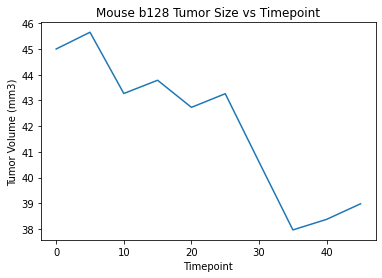

In [23]:
#todos label graph.

#plt.bar(x_data, y_data)
plt.title("Mouse b128 Tumor Size vs Timepoint")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.plot(b128_df["Timepoint"],b128_df["Tumor Volume (mm3)"])

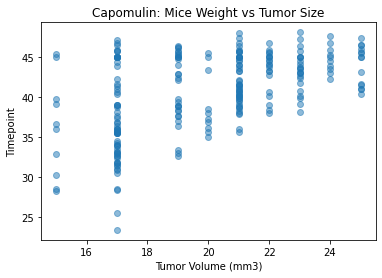

In [24]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
#ToDos:  Add labels
#all_capomulin_df = (tumor_capomulin_df["Weight (g)"], tumor_capomulin_df["Tumor Volume (mm3)"], alpha = 0.5)
plt.title("Capomulin: Mice Weight vs Tumor Size")
plt.xlabel("Tumor Volume (mm3)")
plt.ylabel("Timepoint")
plt.scatter(tumor_capomulin_df["Weight (g)"], tumor_capomulin_df["Tumor Volume (mm3)"], alpha = 0.5)

## Correlation and Regression

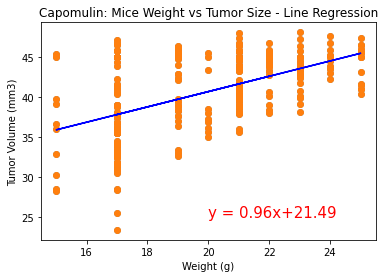

In [25]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
#Calculate the correlation coefficient and linear regression model between mouse weight and average tumor volume for the Capomulin treatment. Plot the linear regression model on top of the previous scatter plot.
plt.scatter(tumor_capomulin_df["Weight (g)"], tumor_capomulin_df["Tumor Volume (mm3)"], alpha = 0.5)

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(tumor_capomulin_df["Weight (g)"],tumor_capomulin_df ["Tumor Volume (mm3)"])
regress_values = (tumor_capomulin_df["Weight (g)"]) * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x" + "+" + str(round(intercept,2))
plt.scatter(tumor_capomulin_df["Weight (g)"],tumor_capomulin_df ["Tumor Volume (mm3)"])
plt.plot(tumor_capomulin_df["Weight (g)"],regress_values,"b-")
plt.annotate(line_eq,(20,25),fontsize=15,color="red")
plt.title("Capomulin: Mice Weight vs Tumor Size - Line Regression")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

#Look across all previously generated figures and tables and write at least three observations or inferences that can be made from the data. Include these observations at the top of notebook.


In [26]:

correlation = st.pearsonr(mouse_data_nodupes_df["Weight (g)"],mouse_data_nodupes_df ["Tumor Volume (mm3)"])[0] 
correlation
print(f"The correlation between Weight(g) of the Tumor Volume (mm3) is {round(correlation,2)}")

The correlation between Weight(g) of the Tumor Volume (mm3) is 0.59
